# Segmentation et Clustering

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./data/Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Analyse univarié

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


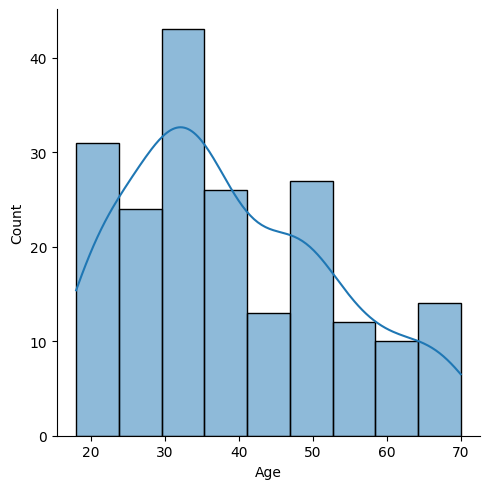

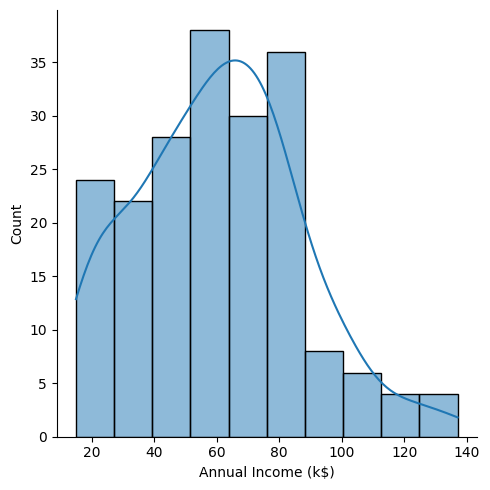

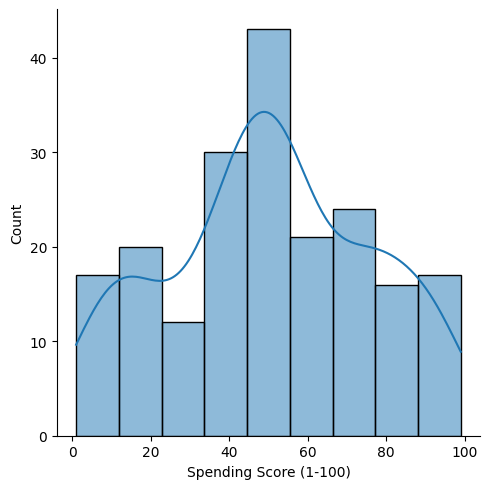

In [6]:
columns = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]

for col in columns:
    sns.displot(df[col], kde = True)
    plt.show()

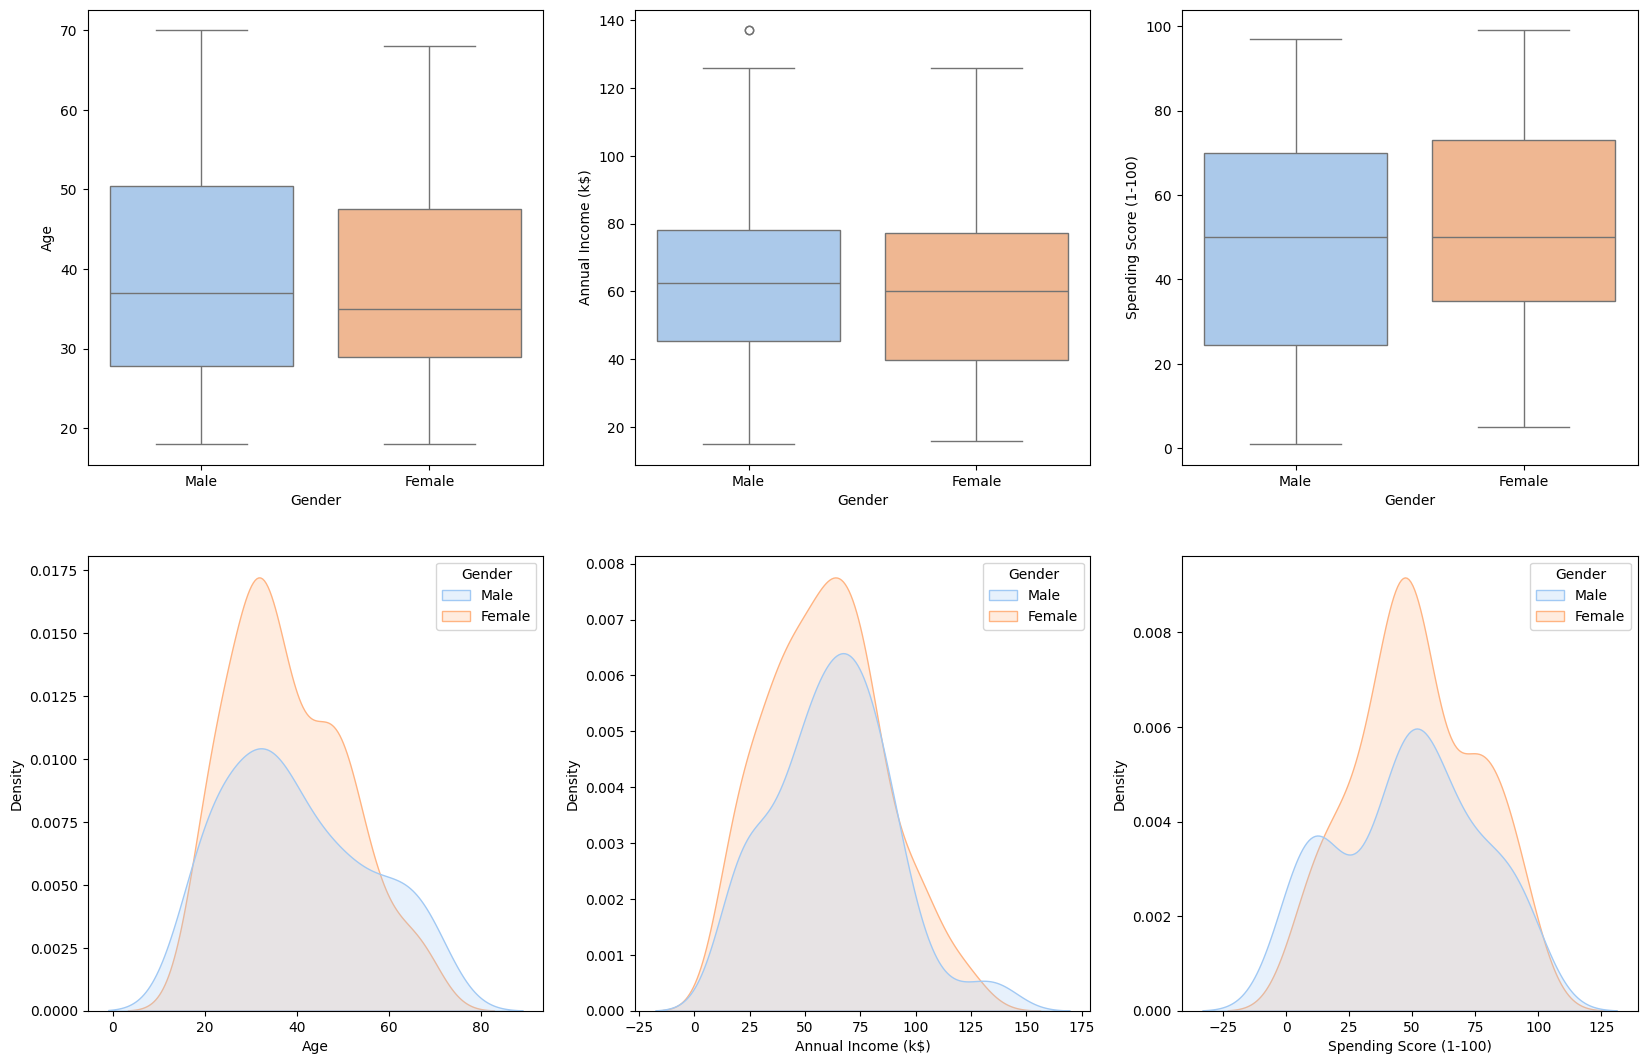

In [7]:
fig, axs = plt.subplots(2,3, figsize = (20,13))

sns.boxplot(data=df, x="Gender", y= df["Age"], hue=df.Gender, palette="pastel", ax=axs[0][0])
sns.boxplot(data=df, x="Gender", y= df["Annual Income (k$)"], hue=df.Gender, palette="pastel", ax=axs[0][1])
sns.boxplot(data=df, x="Gender", y= df["Spending Score (1-100)"], hue=df.Gender, palette="pastel", ax=axs[0][2])

sns.kdeplot(data=df, x=df["Age"],palette="pastel", hue=df["Gender"], fill=True, ax=axs[1][0])
sns.kdeplot(data=df, x=df["Annual Income (k$)"],palette="pastel", hue=df["Gender"], fill=True, ax=axs[1][1])
sns.kdeplot(data=df, x=df["Spending Score (1-100)"],palette="pastel", hue=df["Gender"], fill=True, ax=axs[1][2])

plt.show()

In [8]:
df.Gender.value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

## Analyse bivariée

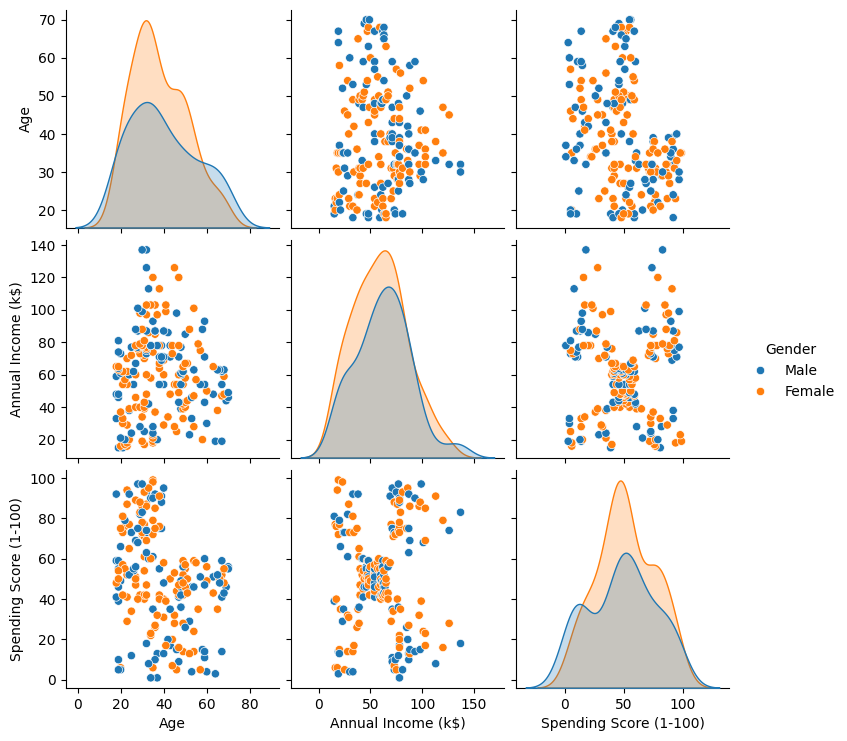

In [9]:
sns.pairplot(df.drop("CustomerID", axis=1), hue="Gender")

In [10]:
df.groupby("Gender")[["Age","Annual Income (k$)", "Spending Score (1-100)"]]. mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


<Axes: >

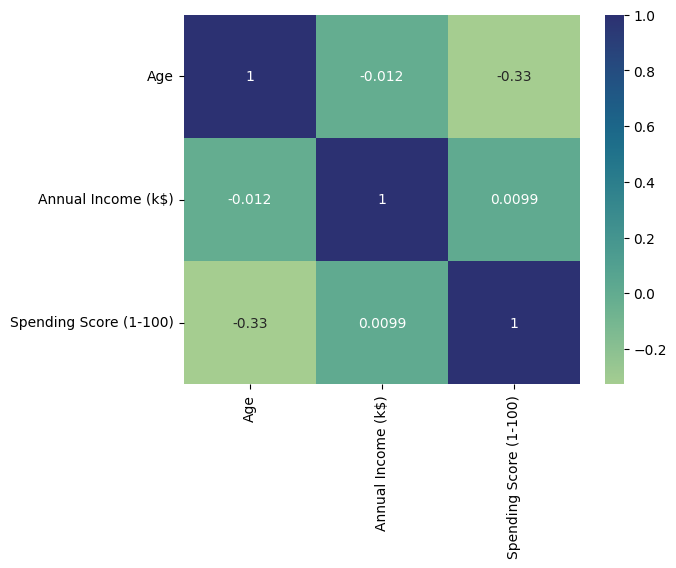

In [11]:
sns.heatmap(df.drop(["CustomerID","Gender"], axis=1).corr(), annot=True, cmap="crest")

## Clustering - univarié, bivarié et multivarié

In [12]:
from sklearn.cluster import KMeans

In [13]:
#Univarié
Cluster_uni = KMeans()

Cluster_uni.fit(df[["Annual Income (k$)"]])
df["Income Cluster"] = Cluster_uni.labels_

df.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
46,47,Female,50,40,55,1
176,177,Male,58,88,15,7
167,168,Female,33,86,95,7
136,137,Female,44,73,7,0
116,117,Female,63,65,43,6


In [14]:
df["Income Cluster"].value_counts()

Income Cluster
0    42
6    36
3    32
4    28
1    26
7    16
2    14
5     6
Name: count, dtype: int64

In [15]:
inertia = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[["Annual Income (k$)"]])
    inertia.append(kmeans.inertia_)

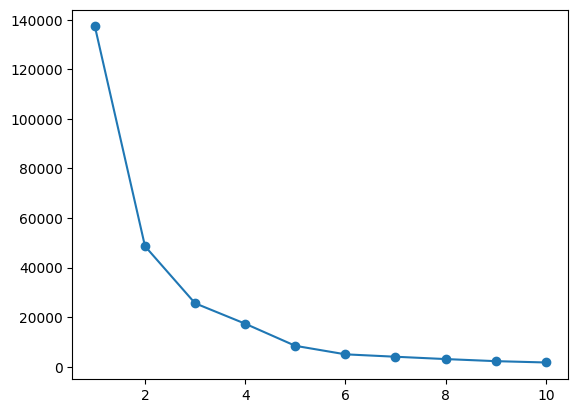

In [16]:
plt.plot(range(1,11), inertia, marker = "o")
plt.show()

In [17]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [19]:
#Bivarié
Cluster_bi = KMeans()
Cluster_bi.fit(df[["Annual Income (k$)",'Spending Score (1-100)']])
df["Spending Score et Income cluster"] = Cluster_bi.labels_

df.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending Score et Income cluster
150,151,Male,43,78,17,0,2
83,84,Female,46,54,44,4,1
143,144,Female,32,76,87,0,6
198,199,Male,32,137,18,5,7
3,4,Female,23,16,77,3,4


In [ ]:
inertia2 = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[["Annual Income (k$)"]])
    inertia2.append(kmeans.inertia_)